##  ITC STOCK MARKETING PRICE PREDICTION FROM  [01-09-2023 to 31-10-2023(3 Months)]
### DATASET FROM NSE India (National Stock Exchange of India Ltd)
### K-NEAREST-NEIGHBORS

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [3]:
INFOSYS= pd.read_csv("Quote-Equity-ITC-EQ-01-08-2023-to-04-11-2023.csv")
INFOSYS = INFOSYS.dropna()
INFOSYS = INFOSYS[["Date ","OPEN ","HIGH ","LOW ","close ","VOLUME "]]

INFOSYS.to_csv("Quote-Equity-ITC-EQ-01-08-2023-to-04-11-2023.csv", index=False)
INFOSYS.head()

,Date,OPEN,HIGH,LOW,close,VOLUME
0,24-Nov-2023,261.40,261.90,257.05,258.15,"71,53,583"
1,23-Nov-2023,262.10,263.75,259.80,260.75,"54,66,513"
2,22-Nov-2023,263.40,263.60,259.25,262.10,"45,37,969"
3,21-Nov-2023,263.75,265.40,260.75,262.65,"69,31,541"
4,20-Nov-2023,263.85,264.40,260.10,260.85,"48,59,705"


In [4]:
INFOSYS.describe()

,OPEN,HIGH,LOW,close
count,127.000000,127.000000,127.000000,127.000000
mean,240.256299,242.524409,237.464173,239.803937
std,17.343473,17.548996,16.811708,17.007603
min,207.200000,211.200000,206.550000,210.800000
25%,222.825000,224.625000,220.800000,221.850000
50%,238.500000,241.700000,235.500000,238.250000
75%,256.925000,258.400000,253.900000,256.650000
max,276.000000,276.500000,269.150000,271.900000


In [5]:
INFOSYS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     127 non-null    object 
 1   OPEN     127 non-null    float64
 2   HIGH     127 non-null    float64
 3   LOW      127 non-null    float64
 4   close    127 non-null    float64
 5   VOLUME   127 non-null    object 
dtypes: float64(4), object(2)
memory usage: 6.1+ KB


In [6]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [7]:
import plotly.graph_objects as go

layout = go.Layout(
    title='STOCK PRICE OF ITC',
    xaxis=dict(
        title='date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='blue'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='red'
        )
    )
)

INFOSYS_DATA = [{'x': INFOSYS['Date '], 'y': INFOSYS['close ']}]

plot = go.Figure(data=INFOSYS_DATA, layout=layout)


In [8]:
iplot(plot)

In [13]:
# INFOSYS['OPEN -close']= INFOSYS.close - INFOSYS.OPEN 
# INFOSYS['High-Low']  = INFOSYS.High - INFOSYS.Low
# INFOSYS = INFOSYS.dropna()
# X= INFOSYS[['Open-close', 'High-Low']]
# X.head()

# INFOSYS = INFOSYS[["Date ","OPEN ","HIGH ","LOW ","close ","VOLUME "]]


INFOSYS['Open-Close'] = INFOSYS["close "] - INFOSYS["OPEN "]
INFOSYS['High-Low'] = INFOSYS["HIGH "] - INFOSYS["LOW "]
INFOSYS = INFOSYS.dropna()
X = INFOSYS[['Open-Close', 'High-Low']]

X.head()

,Open-Close,High-Low
0,-3.25,4.85
1,-1.35,3.95
2,-1.30,4.35
3,-1.10,4.65
4,-3.00,4.30


In [14]:
Y= np.where(INFOSYS["close "].shift(-1)>INFOSYS["close "],1,-1)

In [15]:
split_percentage = 0.8
split = int(split_percentage*len(INFOSYS))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [16]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train, Y_train)

accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))
# model.score(Y_test,predicted)
# accuracy_score(Y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.87
Test_data Accuracy: 0.92


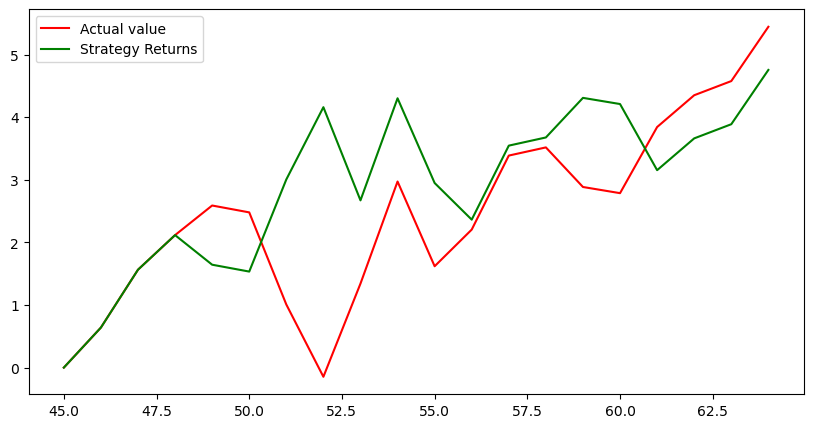

In [17]:
INFOSYS['Predicted_Signal'] = knn.predict(X)

INFOSYS['SPY_returns'] = np.log(INFOSYS['HIGH ' ]/INFOSYS['HIGH '].shift(1))
Cumulative_SPY_returns = INFOSYS[split:]['SPY_returns'].cumsum()*100
 
INFOSYS['Startegy_returns'] = INFOSYS['SPY_returns']* INFOSYS['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = INFOSYS[split:]['Startegy_returns'].cumsum()*100

plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_returns, color='r',label = 'Actual value')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [17]:
import pandas as pd

# Example: Creating DataFrames with cumulative returns
strategy_returns = pd.Series([0.01, 0.02, -0.01, 0.03, -0.02])
spy_returns = pd.Series([0.015, 0.018, -0.012, 0.02, -0.015])

# Calculate cumulative returns
cumulative_strategy_returns = (1 + strategy_returns).cumprod() - 1
cumulative_spy_returns = (1 + spy_returns).cumprod() - 1

# Calculate the standard deviation of strategy returns
strategy_std = cumulative_strategy_returns.std()

# Calculate the Sharpe ratio
sharpe_ratio = (cumulative_strategy_returns - cumulative_spy_returns) / strategy_std

# Calculate the mean of the Sharpe ratio
sharpe_mean = sharpe_ratio.mean()

print('Sharpe ratio: %.2f' % sharpe_mean)


Sharpe ratio: 0.05


In [18]:
model = knn.fit(X_train, Y_train)
 #model = model.fit (X_train,Y_train)

In [19]:
probability = model.predict_proba(X_test)
print(probability)

[[1.         0.        ]
 [0.2        0.8       ]
 [0.73333333 0.26666667]
 [0.8        0.2       ]
 [0.         1.        ]
 [0.13333333 0.86666667]
 [0.53333333 0.46666667]
 [1.         0.        ]
 [0.73333333 0.26666667]
 [0.8        0.2       ]
 [0.13333333 0.86666667]
 [1.         0.        ]
 [0.73333333 0.26666667]
 [0.4        0.6       ]
 [0.13333333 0.86666667]
 [1.         0.        ]
 [0.93333333 0.06666667]
 [0.2        0.8       ]
 [1.         0.        ]
 [0.53333333 0.46666667]
 [0.93333333 0.06666667]
 [0.13333333 0.86666667]
 [0.46666667 0.53333333]
 [1.         0.        ]
 [0.73333333 0.26666667]
 [1.         0.        ]]


In [20]:
Y_test

array([-1,  1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,
        1, -1, -1, -1,  1,  1, -1, -1, -1])

In [21]:
predicted = model.predict(X_test)
predicted

array([-1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1,
        1, -1, -1, -1,  1,  1, -1, -1, -1])

In [23]:
from sklearn import metrics

In [37]:
print(metrics.confusion_matrix(predicted,Y_test))

[[ 6  1]
 [ 2 11]]


In [24]:
print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

          -1       0.94      0.94      0.94        17
           1       0.89      0.89      0.89         9

    accuracy                           0.92        26
   macro avg       0.92      0.92      0.92        26
weighted avg       0.92      0.92      0.92        26



In [25]:
print(metrics.classification_report(predicted,Y_test))

              precision    recall  f1-score   support

          -1       0.94      0.94      0.94        17
           1       0.89      0.89      0.89         9

    accuracy                           0.92        26
   macro avg       0.92      0.92      0.92        26
weighted avg       0.92      0.92      0.92        26



In [26]:
accuracy_score(predicted,Y_test)

0.9230769230769231

### ACCURACY OF TRAINING MODEL FOR INFOSYS STOCK MARKET PRICE PREDICTION IS ABOUT 85%.